In [88]:
!pip install tqdm -U
!pip install dimcli -U
!pip install googletrans

Requirement already up-to-date: tqdm in /usr/local/lib/python3.7/site-packages (4.36.0)
     |████████████████████████████████| 112kB 2.1MB/s eta 0:00:01
  Found existing installation: dimcli 0.5.6.1
    Uninstalling dimcli-0.5.6.1:
      Successfully uninstalled dimcli-0.5.6.1


In [1]:
import pandas
import time
from tqdm import tqdm
from googletrans import Translator
import dimcli

In [2]:
dimcli.login()
dsl = dimcli.Dsl()
translator = Translator()

DimCli v0.5.6.2 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


In [3]:
sources = [x for x in dimcli.G.sources() if x != 'researchers']

## Build query keywords

In [24]:
def translate(word):
    # eg translate('乳がん')
    r = translator.translate(word)
    return r.text

def build_keywords(word):
    "craetes keywords for multiple searches"
    t = translate(word)
    return [f"""\\\"{word}\\\"""", f"""\\\"{t}\\\"""", f"""\\\"{word}\\\" OR \\\"{t}\\\""""]
    
    
# eg '乳がん' 

In [25]:
search_term = "乳がん"
# expansion
keywords = build_keywords('乳がん')

In [26]:
# e.g.
keywords

['\\"乳がん\\"', '\\"Breast cancer\\"', '\\"乳がん\\" OR \\"Breast cancer\\"']

## Search

In [10]:
def multi_search(keywords, sources):
    "Launch same keyword search across multiple sources"
    out = []
    for k in tqdm(keywords):
        for s in tqdm(sources):
            res = dsl.query(f"""search {s} for \"{k}\" return {s} limit 1""",  show_results=False)
    #         print(s, res.total_count)
            out.append({'source' : s, 'objects' : res.total_count, 'query' : k})
            time.sleep(1)
    return pandas.DataFrame.from_dict(out)

In [27]:
df = multi_search(keywords, sources)
df

100%|██████████| 3/3 [00:27<00:00,  9.05s/it]


,objects,query,source
0,7218,"\""乳がん\""",publications
1,461,"\""乳がん\""",grants
2,1,"\""乳がん\""",patents
3,0,"\""乳がん\""",clinical_trials
4,0,"\""乳がん\""",policy_documents
5,1846164,"\""Breast cancer\""",publications
6,36701,"\""Breast cancer\""",grants
7,284121,"\""Breast cancer\""",patents
8,14611,"\""Breast cancer\""",clinical_trials
9,6139,"\""Breast cancer\""",policy_documents


## Plot the data

In [12]:
import plotly_express as px

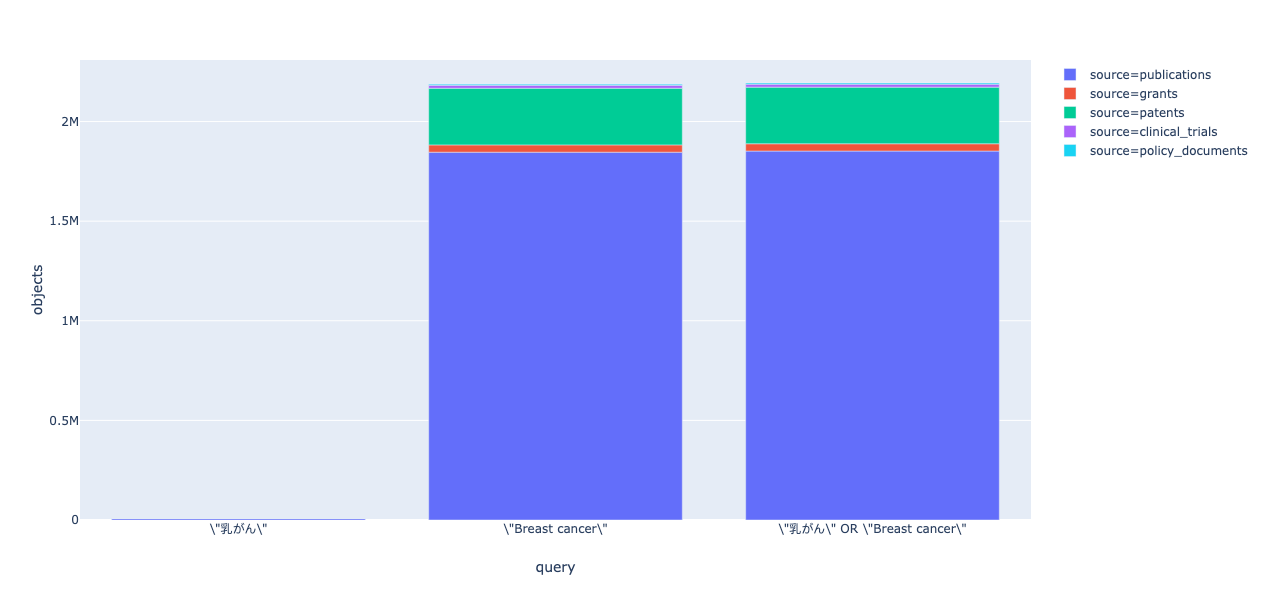

In [28]:
px.bar(df, x="query", y="objects", color="source")

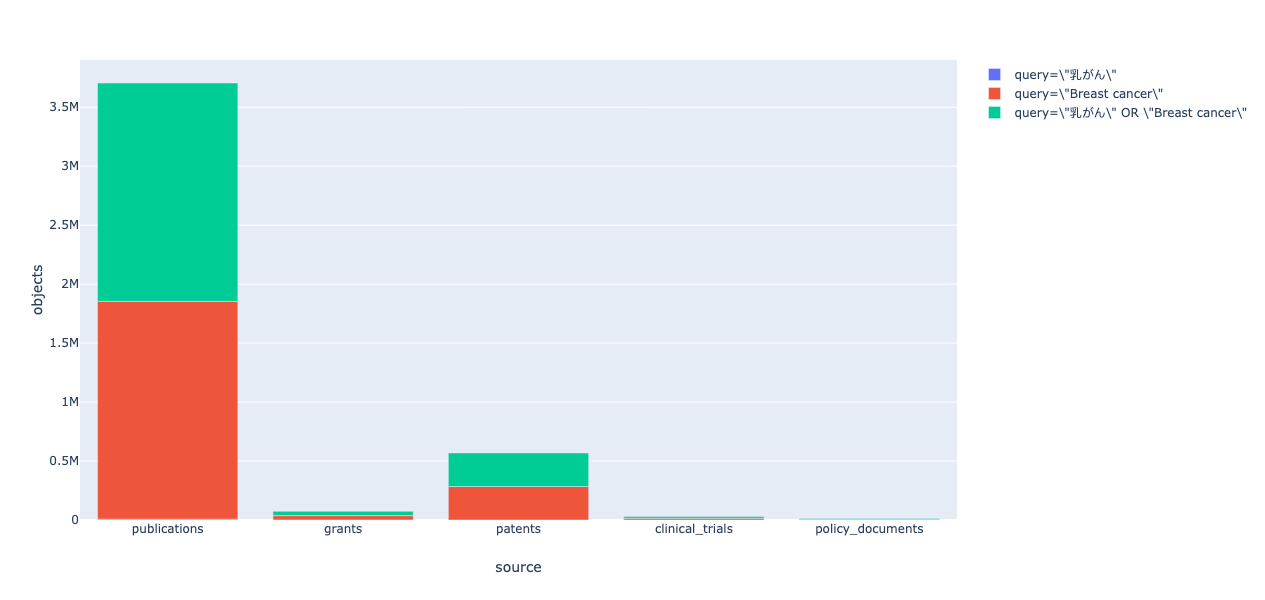

In [29]:
px.bar(df, x="source", y="objects", color="query")